In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
%matplotlib inline 

import datetime as dt
fromtimestamp = dt.datetime.fromtimestamp

In [2]:
data = pd.read_csv('../Data/Datasets/googletopics_weekid_v3.csv')

In [3]:
data = data.sort_values('week_id').reset_index(drop = True).drop('Unnamed: 0', axis = 1)
data.head()

,rel_val,topic,week_dt,year,month,week_of_year,week_id
0,1.0,fcrisis,2008-01-06,2008,1,1,2008-1
1,3.0,fcrisis,2008-03-09,2008,3,10,2008-10
2,5.0,fcrisis,2008-03-16,2008,3,11,2008-11
3,5.0,fcrisis,2008-03-23,2008,3,12,2008-12
4,4.0,fcrisis,2008-03-30,2008,3,13,2008-13


In [4]:
ufos = pd.read_csv('../Data/Datasets/cleandate_weekly_reval.csv')
ufos['startdateweek'] = pd.to_datetime(ufos['startdateweek'])
ufos = (ufos.sort_values('startdateweek')
            .reset_index(drop = True)
            .drop('Unnamed: 0', axis = 1))

#ufos = ufos.assign( year = ufos['week_id']
ufos

,startdateweek,weekly_ufocount,rel_val_alltime,year,month,weeknum,week_id
0,2006-01-08,3,0.638298,2006,1,1,2006-1
1,2006-01-15,8,1.702128,2006,1,2,2006-2
2,2006-01-22,6,1.276596,2006,1,3,2006-3
3,2006-01-29,8,1.702128,2006,1,4,2006-4
4,2006-02-05,2,0.425532,2006,2,5,2006-5
...,...,...,...,...,...,...,...
761,2020-08-09,154,32.765957,2020,8,32,2020-32
762,2020-08-16,190,40.425532,2020,8,33,2020-33
763,2020-08-23,147,31.276596,2020,8,34,2020-34
764,2020-08-30,107,22.765957,2020,8,35,2020-35


#### Plotting Corona and Ufos

In [5]:
corona = data.loc[data['topic'] == 'corona'] 

In [6]:
combined = pd.merge(ufos , corona , how = 'inner', on = 'week_id')


In [7]:
# adding column with relative values for ufos during corona period 
max_ufo_cor = combined['weekly_ufocount'].max()
combined = combined.assign(ufo_perc_cor = (combined['weekly_ufocount'] / max_ufo_cor)* 100 )

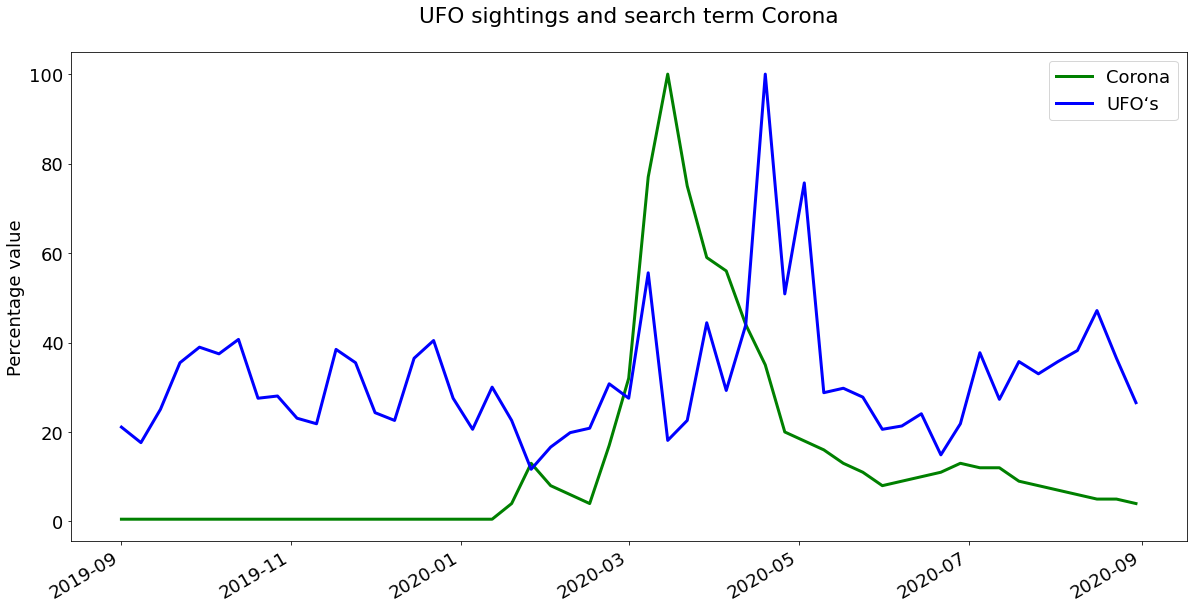

In [30]:
# plotting the ufos in blue and the corona search term values in green

fig, ax = plt.subplots ( figsize = (20, 10))
fig.autofmt_xdate()

plt.rcParams.update({'font.size': 18})

#sns.set_context('talk')

ax1 = sns.lineplot ( x = combined['startdateweek'] , y = combined['rel_val'], color = 'green', linewidth = 3 )

ax2 = sns.lineplot ( x = combined['startdateweek'], y= combined['ufo_perc_cor'], color = 'blue', linewidth = 3 )

ax2.set_title('UFO sightings and search term Corona\n')
ax1.set_ylabel ('Percentage value')
ax2.set_ylabel ('Percentage value')
ax1.set_xlabel ('')
ax2.set_xlabel ('')


ax1.legend(['Corona', 'UFO‘s'])
ax2.legend(['Corona', 'UFO‘s'])

#plt.savefig("../BeautifulPlots/ufo_corona.png")

#### Plotting financial crisis and ufos

In [9]:
fcrisis = data.loc[data['topic'] == 'fcrisis']

In [10]:
combined2 = pd.merge(ufos , fcrisis , how = 'inner', on = 'week_id')

In [11]:
# adding column with realtive values for ufos during period of fcrisis
max_ufos_fcrisis = combined2['weekly_ufocount'].max()
combined2 = combined2.assign(ufo_perc_fcrisis = (combined2['weekly_ufocount']/ max_ufos_fcrisis)* 100)

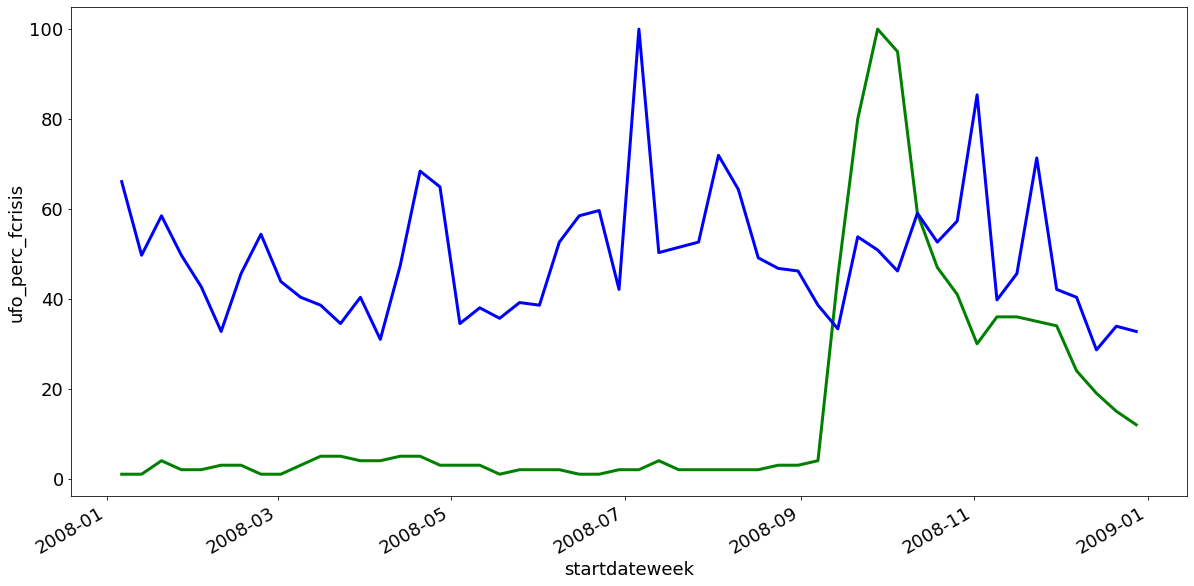

In [12]:
# plotting the ufos in blue and the fin. crisis search term values in green
fig, ax = plt.subplots ( figsize = (20, 10))
fig.autofmt_xdate()
#ax.fmt_xdata = 
ax1 = sns.lineplot ( x = combined2['startdateweek'] , y = combined2['rel_val'], color = 'green', linewidth = 3)

ax2 = sns.lineplot ( x = combined2['startdateweek'], y= combined2['ufo_perc_fcrisis'], color = 'blue', linewidth = 3)


#### Plotting Boston Marathon bombings and ufos 

In [13]:
boston = data.loc[data['topic'] == 'boston']

In [14]:
combined3 = pd.merge( ufos , boston, how = 'inner', on = 'week_id')

In [15]:
# adding column with realtive values for weekly ufo count in 2013
max_ufos_boston = combined3['weekly_ufocount'].max()
combined3 = combined3.assign(ufo_perc_boston = (combined3['weekly_ufocount'] / max_ufos_boston)*100)

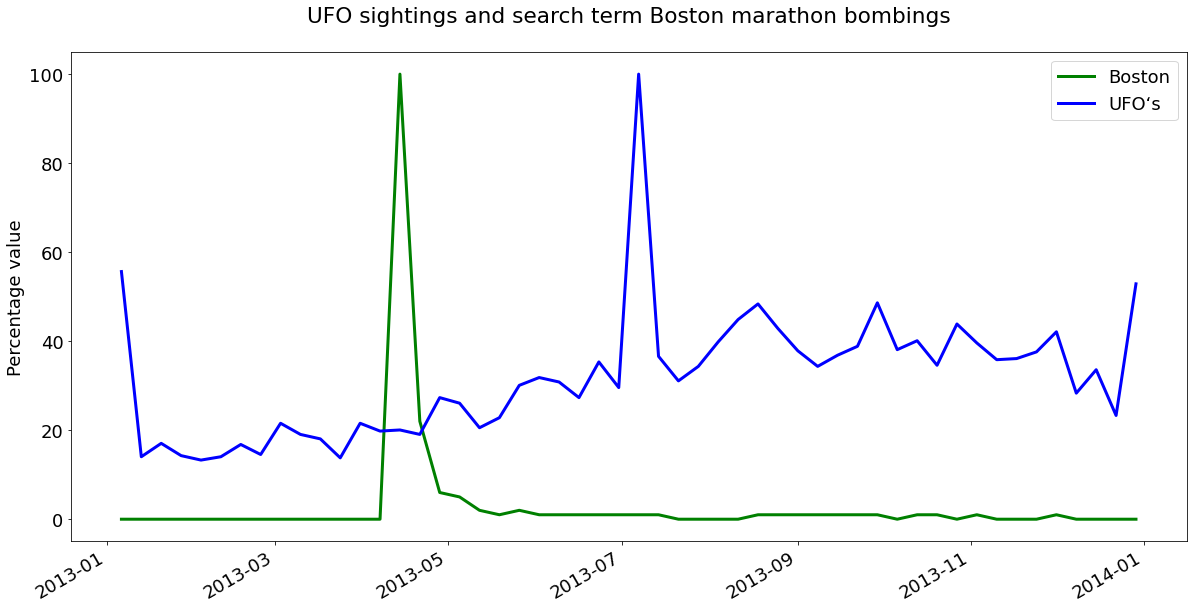

In [17]:
# plotting the ufos in blue and the boston marathon bombings data in green 
fig, ax = plt.subplots ( figsize = (20, 10))
fig.autofmt_xdate()

ax1 = sns.lineplot ( x = combined3['startdateweek'] , y = combined3['rel_val'], color = 'green', linewidth = 3)

ax2 = sns.lineplot ( x = combined3['startdateweek'], y= combined3['ufo_perc_boston'], color = 'blue', linewidth = 3)

ax2.set_title('UFO sightings and search term Boston marathon bombings\n')
ax1.set_ylabel ('Percentage value')
ax2.set_ylabel ('Percentage value')
ax1.set_xlabel ('')
ax2.set_xlabel ('')

plt.rcParams.update({'font.size': 18})
ax1.legend(['Boston', 'UFO‘s'])
ax2.legend(['Boston', 'UFO‘s'])

#plt.savefig("../BeautifulPlots/ufo_boston.png")

#### Plotting Arab Spring and ufos

In [18]:
arab = data.loc[data['topic'] == 'arab_spring']

In [19]:
combined4 = pd.merge(ufos, arab, how = 'inner', on = 'week_id')

In [20]:
#adding column with relative ufo values during arab spring
max_ufos_arab = combined4['weekly_ufocount'].max()
combined4 = combined4.assign(ufo_perc_arab= (combined4['weekly_ufocount']/ max_ufos_arab )*100 )


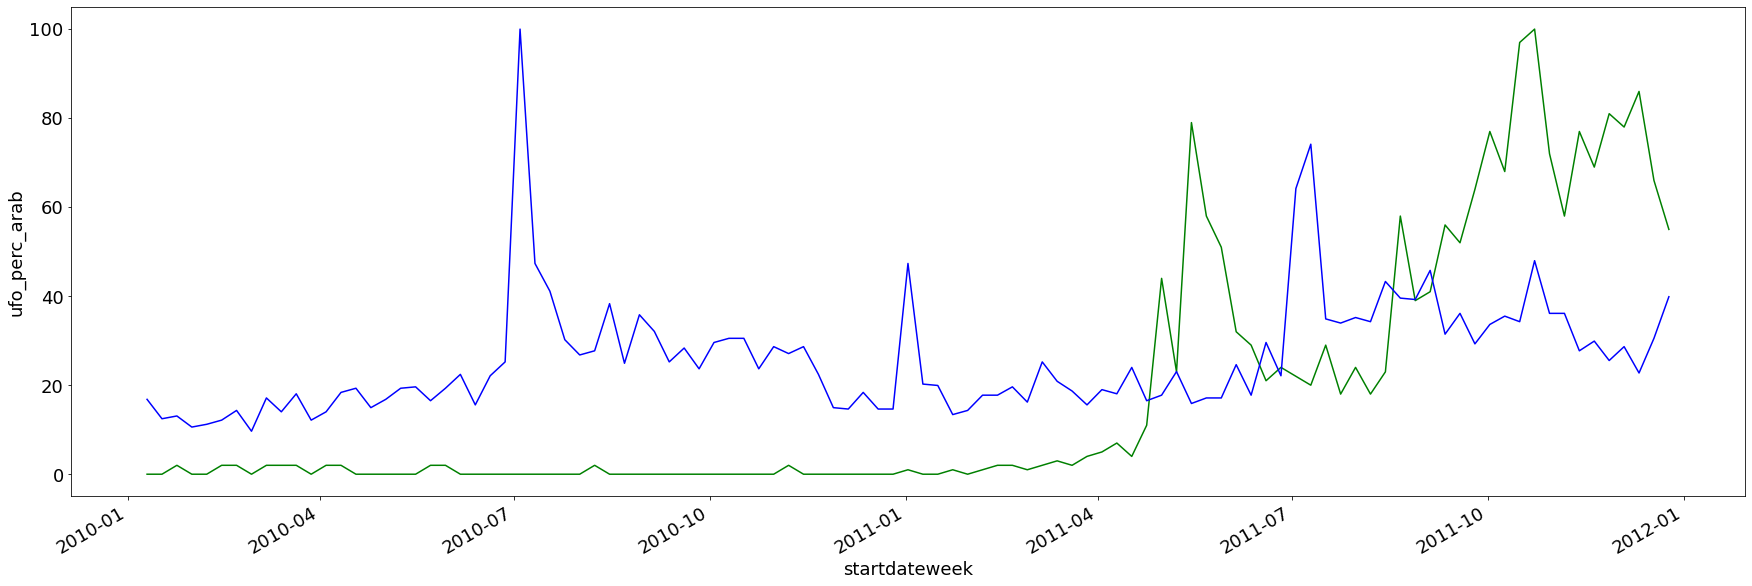

In [21]:
# plotting ufos in blue and arab spring  data in green
fig, ax = plt.subplots( figsize = (30, 10))
fig.autofmt_xdate()
ax1 = sns.lineplot( x = combined4['startdateweek'], y= combined4['rel_val'], color = 'green')
ax2 = sns.lineplot( x = combined4['startdateweek'], y= combined4['ufo_perc_arab'], color = 'blue')

#### Plotting Kremlin data and ufos

In [22]:
kremlin = data.loc[data['topic'] == 'kremlin']

In [23]:
combined5 = pd.merge( ufos, kremlin, how = 'inner', on = 'week_id')

In [24]:
# adding column relative values ufocount for 2014
max_ufos_kremlin = combined5['weekly_ufocount'].max()
combined5 = combined5.assign(ufo_perc_kremlin = (combined5['weekly_ufocount'] / max_ufos_kremlin)*100)

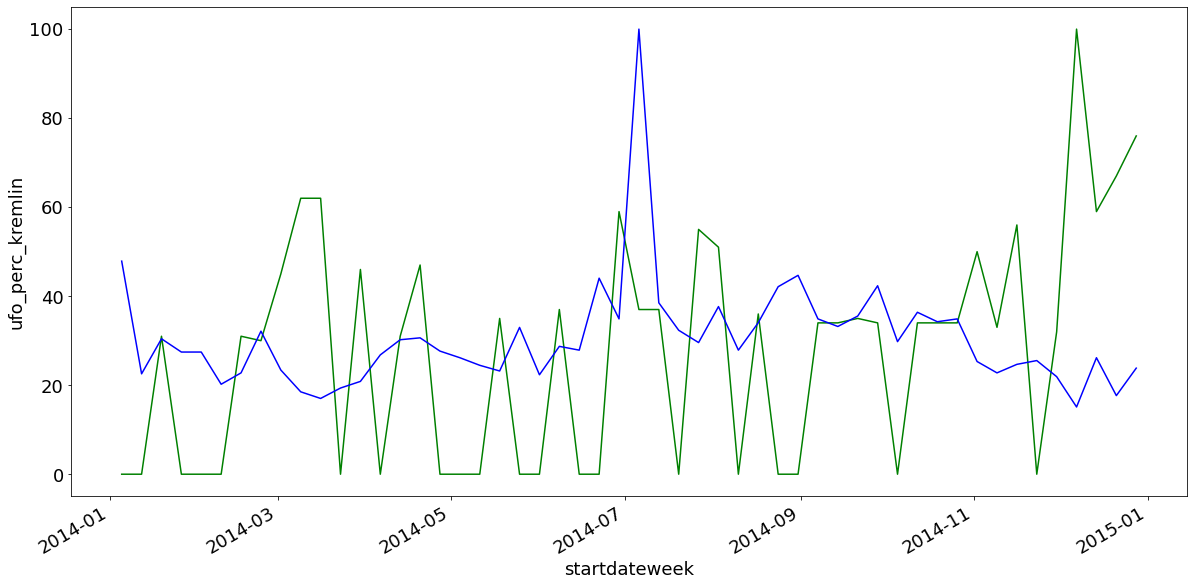

In [25]:
# plotting the ufos in blue and kremlin data in green
fig, ax = plt.subplots( figsize = (20, 10))
fig.autofmt_xdate()

ax1 = sns.lineplot( x = combined5['startdateweek'], y= combined5['rel_val'], color= 'green')
ax2 = sns.lineplot( x = combined5['startdateweek'], y = combined5['ufo_perc_kremlin'], color = 'blue')

#### Plotting search term Trump and UFO sightings

In [26]:
trump = data.loc[data.topic == 'trump']

In [27]:
combined6 = pd.merge(ufos, trump, how= 'inner', on = 'week_id')

In [28]:
max_ufos_trump = combined6.weekly_ufocount.max()
combined6 = combined6.assign( ufo_perc_trump = (combined6.weekly_ufocount / max_ufos_trump)* 100 )
combined6 = combined6.loc[combined6.startdateweek <= '2017-05-01']

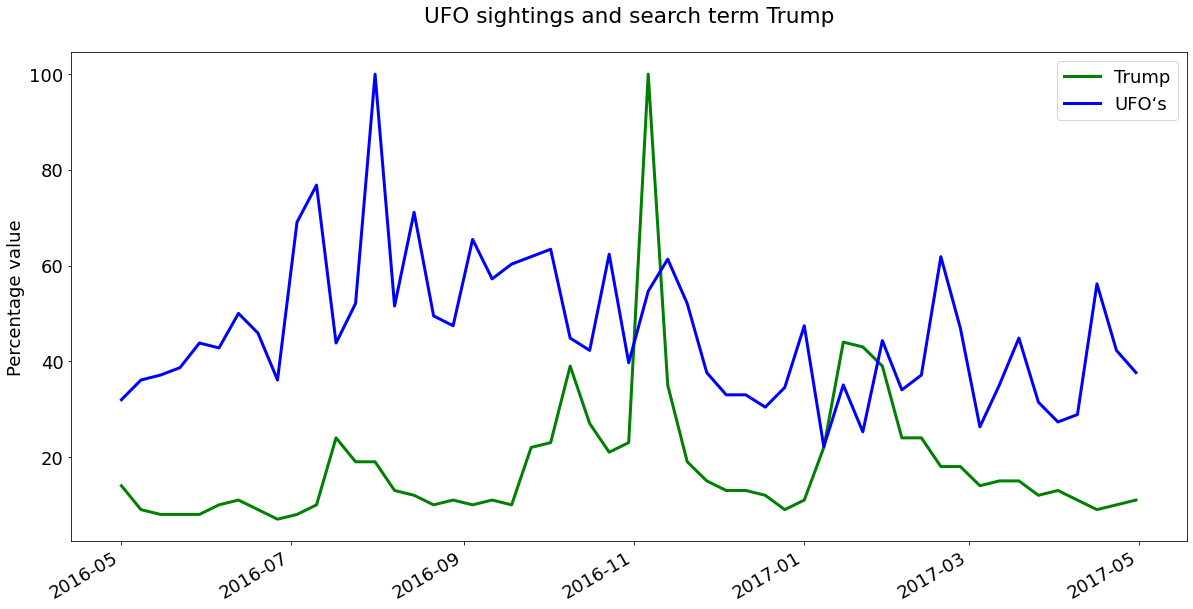

In [31]:
# plotting the ufos in blue and trump data in green
fig, ax = plt.subplots( figsize = (20, 10))
fig.autofmt_xdate()

ax1 = sns.lineplot( x = combined6['startdateweek'], y= combined6['rel_val'], color= 'green', linewidth = 3)
ax2 = sns.lineplot( x = combined6['startdateweek'], y = combined6['ufo_perc_trump'], color = 'blue', linewidth = 3)

ax2.set_title('UFO sightings and search term Trump\n')
ax1.set_ylabel ('Percentage value')
ax2.set_ylabel ('Percentage value')



ax1.set_xlabel ('')
ax2.set_xlabel ('')

#plt.rcParams.update({'font.size': 18})

ax1.legend(['Trump', 'UFO‘s'])
ax2.legend(['Trump', 'UFO‘s'])



#plt.savefig("../BeautifulPlots/ufo_trump.png")